# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#city_data = []

city_url = f"{url}appid={weather_api_key}&units={units}&?q={city}"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?appid=201631559282a4adc61c44171e92f12e&units=metric&?q=grytviken


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | al 'alamayn
City not found. Skipping...
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | el granada
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | fale old settlement
Processing Record 10 of Set 1 | dalby
Processing Record 11 of Set 1 | petrozavodsk
Processing Record 12 of Set 1 | fada
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | bang saphan
Processing Record 15 of Set 1 | antofagasta
Processing Record 16 of Set 1 | nili
Processing Record 17 of Set 1 | itaituba
Processing Record 18 of Set 1 | inhambane
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | gbadolite
Processing Record 21 of Set 1 | bethel
Processing Record 22 

Processing Record 37 of Set 4 | san juan
Processing Record 38 of Set 4 | san fernando
Processing Record 39 of Set 4 | papatowai
Processing Record 40 of Set 4 | ambon
Processing Record 41 of Set 4 | mukah
City not found. Skipping...
Processing Record 42 of Set 4 | zeya
Processing Record 43 of Set 4 | san antonio del estrecho
City not found. Skipping...
Processing Record 44 of Set 4 | gadzhiyevo
Processing Record 45 of Set 4 | papao
Processing Record 46 of Set 4 | mejit
Processing Record 47 of Set 4 | bandar-e genaveh
Processing Record 48 of Set 4 | upata
Processing Record 49 of Set 4 | miquelon
Processing Record 0 of Set 5 | kumeny
Processing Record 1 of Set 5 | dazhou
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | morant bay
Processing Record 4 of Set 5 | ha'il
Processing Record 5 of Set 5 | uturoa
Processing Record 6 of Set 5 | kolonia town
Processing Record 7 of Set 5 | lihue
Processing Record 8 of Set 5 | dudinka
Processing Record 9 of Set 5 | pariaman
Proce

Processing Record 29 of Set 8 | warmbad
Processing Record 30 of Set 8 | pisco
Processing Record 31 of Set 8 | pacific grove
Processing Record 32 of Set 8 | bacalar
Processing Record 33 of Set 8 | chaiyaphum
Processing Record 34 of Set 8 | malabar
Processing Record 35 of Set 8 | tafuna
Processing Record 36 of Set 8 | charlotte amalie
Processing Record 37 of Set 8 | benton harbor
Processing Record 38 of Set 8 | fort mcmurray
Processing Record 39 of Set 8 | genhe
Processing Record 40 of Set 8 | horta
Processing Record 41 of Set 8 | ribeira brava
Processing Record 42 of Set 8 | kerikeri
Processing Record 43 of Set 8 | belokurikha
Processing Record 44 of Set 8 | giridih
Processing Record 45 of Set 8 | maragogi
Processing Record 46 of Set 8 | beacon square
Processing Record 47 of Set 8 | box elder
Processing Record 48 of Set 8 | dakhla
Processing Record 49 of Set 8 | antsiranana
Processing Record 0 of Set 9 | krakeel
Processing Record 1 of Set 9 | katsuura
Processing Record 2 of Set 9 | kere

Processing Record 21 of Set 12 | tralee
Processing Record 22 of Set 12 | greymouth
Processing Record 23 of Set 12 | sirte
Processing Record 24 of Set 12 | le vauclin
Processing Record 25 of Set 12 | okha
Processing Record 26 of Set 12 | gueltat zemmour
City not found. Skipping...
Processing Record 27 of Set 12 | kruisfontein
Processing Record 28 of Set 12 | nikolayevsk-on-amure
Processing Record 29 of Set 12 | trinidad
Processing Record 30 of Set 12 | alofi
Processing Record 31 of Set 12 | nishinoomote
Processing Record 32 of Set 12 | guiuan
Processing Record 33 of Set 12 | valdivia
Processing Record 34 of Set 12 | cill airne
Processing Record 35 of Set 12 | punto fijo
Processing Record 36 of Set 12 | mogocha
Processing Record 37 of Set 12 | daru
Processing Record 38 of Set 12 | rioblanco
Processing Record 39 of Set 12 | sola
Processing Record 40 of Set 12 | linares
Processing Record 41 of Set 12 | freeport
Processing Record 42 of Set 12 | bandon
Processing Record 43 of Set 12 | zhigal

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,18.39,55,0,3.15,AU,1726552203
1,el granada,37.5027,-122.4694,14.09,87,100,1.54,US,1726552204
2,grytviken,-54.2811,-36.5092,-1.42,77,41,5.30,GS,1726552206
3,san patricio,28.0170,-97.5169,23.97,78,0,3.41,US,1726552207
4,waitangi,-43.9535,-176.5597,9.34,96,100,1.34,NZ,1726552208


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

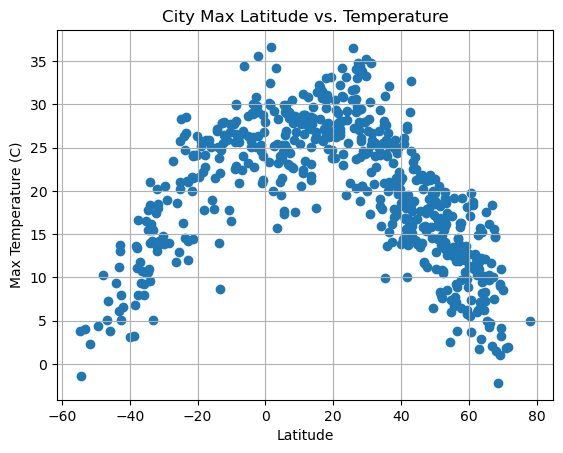

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

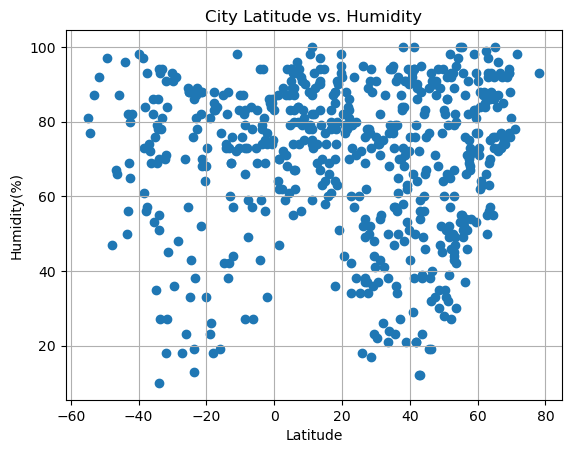

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

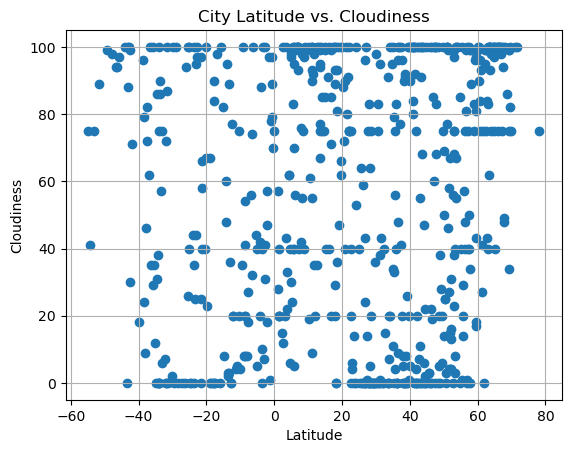

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

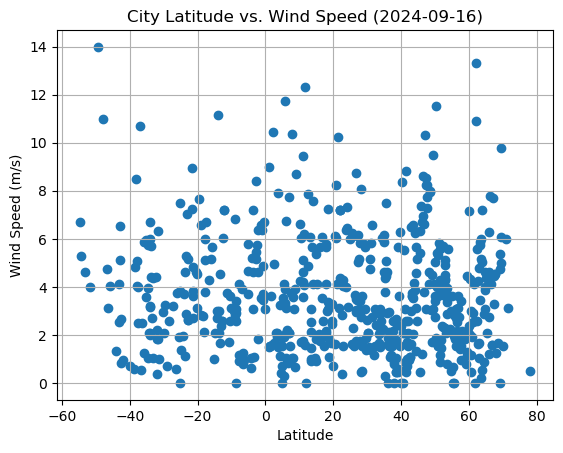

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2024-09-16)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_linear_regression_plot(x, y, xlabel, ylabel):
    # Create a scatter plot of the data
    plt.scatter(x, y, color='blue', label='Data Points')
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Create a linear regression line
    line = slope * x + intercept

     # Plot the regression line
    plt.plot(x, line, color='red', label='Regression Line')

     # Annotate the plot with the equation and r-squared value
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.annotate(line_eq, (0.05, 0.95), fontsize=12, color='red', ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.90, f'$R^2 = {r_value**2:.2f}$', fontsize=12, color='red', ha='left', va='top', transform=plt.gca().transAxes)

    # Label the axes
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show legend
    plt.legend()

    # Show plot
    plt.show()


    

    

In [15]:
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,el granada,37.5027,-122.4694,14.09,87,100,1.54,US,1726552204
3,san patricio,28.0170,-97.5169,23.97,78,0,3.41,US,1726552207
5,whitehorse,60.7161,-135.0538,7.43,84,75,0.45,CA,1726551455
6,albany,42.6001,-73.9662,14.64,72,100,1.09,US,1726552210
9,petrozavodsk,61.7849,34.3469,12.70,88,0,0.00,RU,1726552213


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,18.39,55,0,3.15,AU,1726552203
2,grytviken,-54.2811,-36.5092,-1.42,77,41,5.30,GS,1726552206
4,waitangi,-43.9535,-176.5597,9.34,96,100,1.34,NZ,1726552208
7,fale old settlement,-9.3852,-171.2468,27.78,76,35,2.99,TK,1726552211
8,dalby,-27.1833,151.2667,23.52,18,0,3.21,AU,1726552212


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.6172036392556262


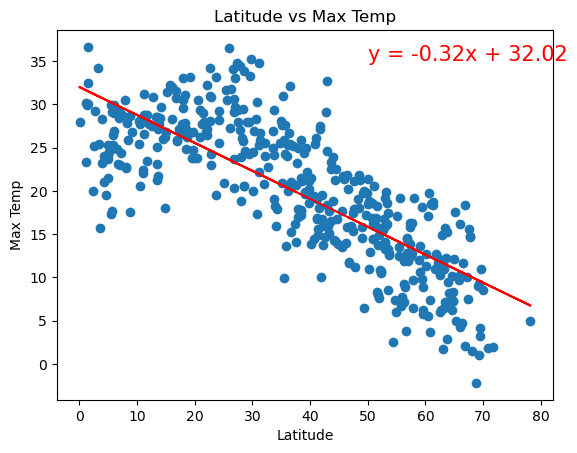

In [46]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,35),fontsize=15,color="red")
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-squared is: 0.7120830034625276


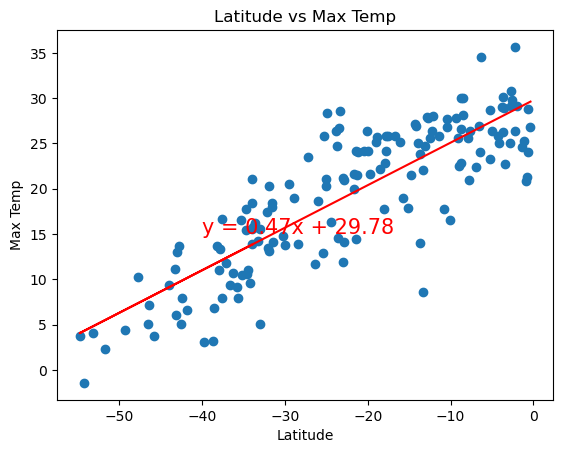

In [45]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,15),fontsize=15,color="red")
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**
 
* Northern Hemisphere: *
The r-squared value for the Northern Hemisphere is 0.6172, which suggests a moderately strong linear association. The maximum temperature tends to drop as latitude rises (going northward).

* Southern Hemisphere: *
The Southern Hemisphere has a stronger linear connection than the Northern Hemisphere, as seen by the r-squared value of 0.7121. The maximum temperature tends to decrease with decreasing latitude, or going southward.

**Discussion:**
The Southern Hemisphere has a marginally greater link between latitude and temperature, but both hemispheres clearly demonstrate an inverse relationship. This is consistent with the widely held belief that temperatures drop as one approaches the poles from the equator.



### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.002955563620947071


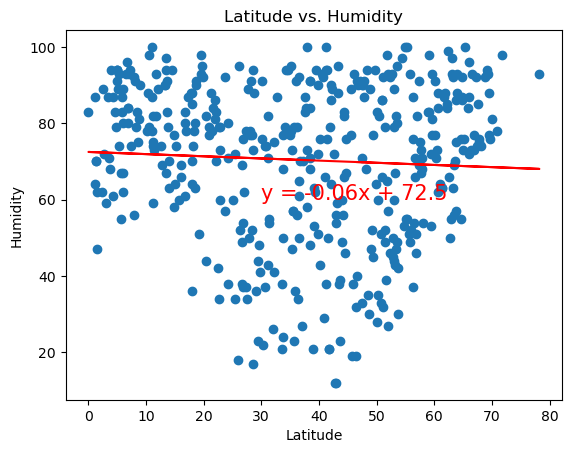

In [44]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=15,color="red")
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0005339464873172998


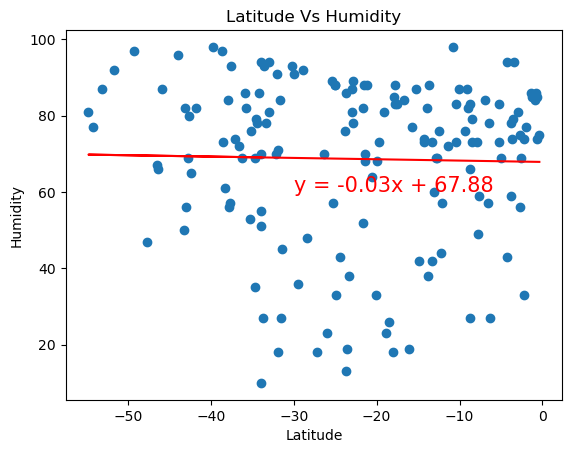

In [42]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.title("Latitude Vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 

* Northern Hemisphere:
 The r-squared value of 0.0030 shows that there is a very weak linear correlation between humidity and latitude.

* Southern Hemisphere: 
0.0005 is the r-squared value, which likewise indicates a extremely weak linear association.

**Discussion:** 
Latitude and humidity have almost no linear connection in either hemisphere. This implies that variables like terrain, local temperature patterns, and proximity to bodies of water have an impact on humidity in addition to latitude alone.


### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0036913141386396564


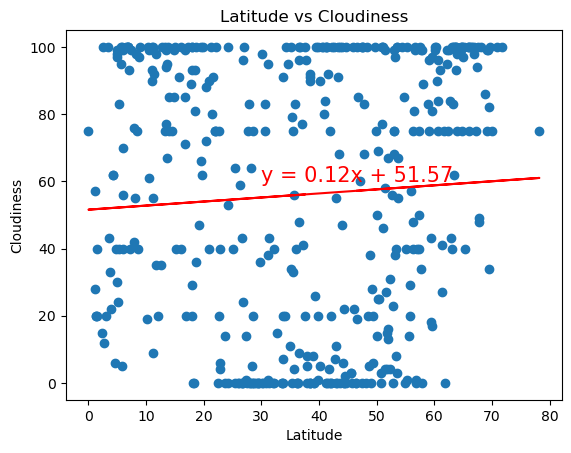

In [48]:
# Northern Hemisphere
# YOUR CODE HER
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.03373111133490194


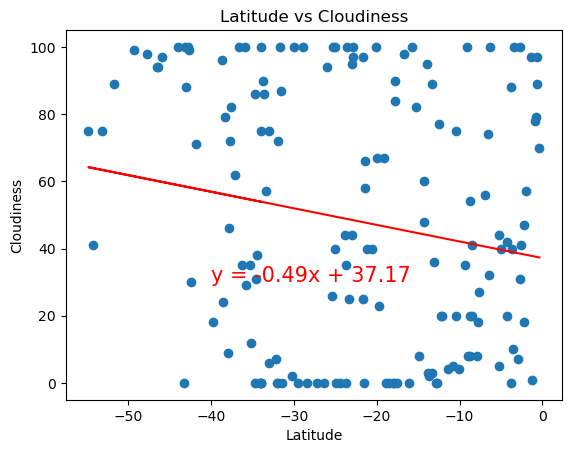

In [49]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 

* Northern Hemisphere:
Cloudiness and latitude in the Northern Hemisphere have a very weak linear connection, as seen by the r-squared value of 0.0037.

* Southern Hemisphere: 
An somewhat stronger but still weak association is indicated by the r-squared value of 0.0337.

**Discussion:** 
Latitude and cloudiness show mild linear connections in both hemispheres, with the Southern Hemisphere exhibiting a somewhat greater link. This implies that variables other than latitude, such terrain, oceanic currents, and local weather patterns, can affect cloudiness.


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 4.6903327745206206e-05


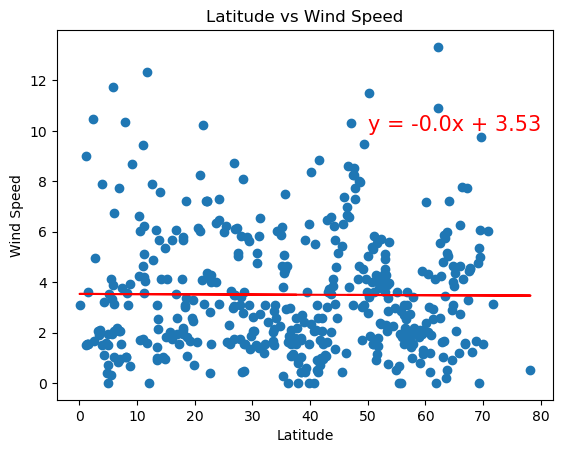

In [50]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0017546449887230595


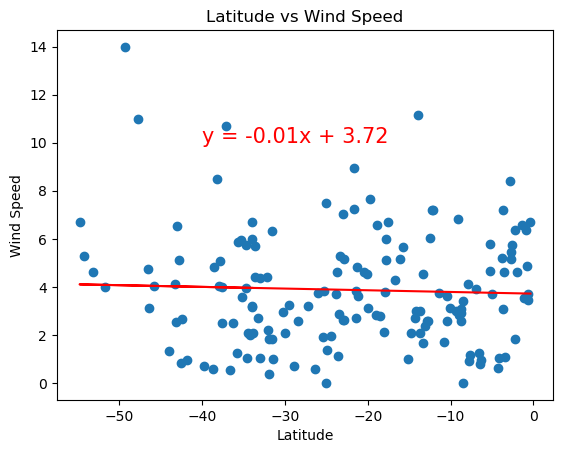

In [51]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 

* Northern Hemisphere:
In the Northern Hemisphere, the r-squared value of 0.0000469 suggests a negligibly weak or nonexistent linear correlation between wind speed and latitude.

* Southern Hemisphere:
The Southern Hemisphere has a extremely weak linear association, as indicated by the r-squared value of 0.0018.

**Discussion:** 
The connection between latitude and wind speed is essentially nonlinear in both hemispheres. This suggests that wind speed is not just influenced by latitude, but rather by a complex interplay of variables including terrain, local climatic patterns, and pressure systems.

Overall, the research indicates that only temperature in both hemispheres has a significant linear association with latitude among the four variables. The complicated nature of these meteorological variables and their correlations to latitude is shown by the weak to nonexistent linear associations that humidity, cloudiness, and wind speed show with latitude. 